### Simple geometry example

Written by Ali A. Eftekhari

Last checked: June 2021
 
Ported to Python by Gavin M. Weir, June 2023


How to use cellLocations and faceLocations functiosn to define cell and face values, variable in space

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# explicit imports
from pyfvtool import Grid2D
from pyfvtool import cellLocations, CellVariable
from pyfvtool import faceLocations, FaceVariable
from pyfvtool import visualizeCells

In [3]:
# Cell Variable:
# m = Grid2D(Nx=int(30), Ny=int(20), Lx=float(5.0), Ly=float(3.0))
m = Grid2D(int(30), int(20), float(5.0), float(3.0))

print(m.dims)

[30 20]


In [4]:
X, Y = cellLocations(m)

print((X.domain.dims, Y.domain.dims))
print((X.value.shape, Y.value.shape))

(array([30, 20]), array([30, 20]))
((30, 20), (30, 20))


In [5]:
type(m)

pyfvtool.mesh.Grid2D

In [6]:
c = CellVariable(m, np.sin(X.value)*np.cos(Y.value))

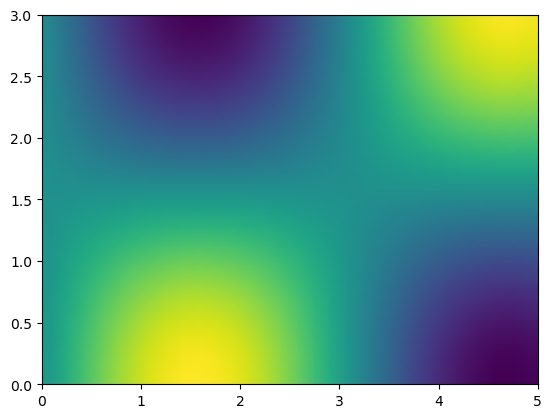

In [7]:
plt.figure()
visualizeCells(c)

In [8]:
# Face variable:
Xf, Yf = faceLocations(m)

In [9]:
v = FaceVariable(m, 0)
v.xvalue = np.sin(Xf.xvalue)*Xf.yvalue
v.yvalue = np.cos(Yf.xvalue)*np.sin(Yf.yvalue)

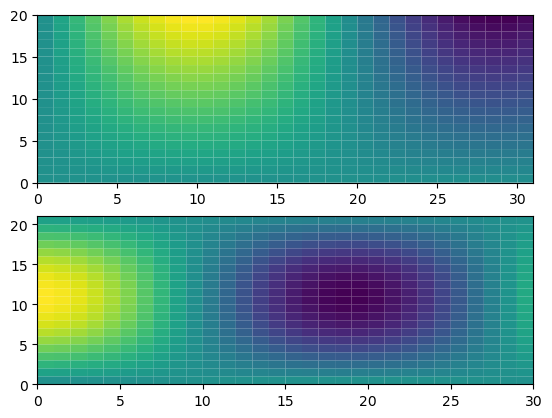

In [10]:
hfig, (ax1, ax2) = plt.subplots(2, 1)

ax1.pcolor(v.xvalue.T, edgecolors=None)
ax2.pcolor(v.yvalue.T, edgecolors=None);